In [24]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df_learn = pd.read_csv("../experiments/yinyang_mult/df_learn.csv")
df_runtime = pd.read_csv("../experiments/yinyang_mult/df_runtime.csv")

In [3]:
df_runtime.head()

,Runtime,Sim ID,Model,Method,Number Input Datasets
0,162.630718,0,Spike,Feedback Align,1
1,162.446807,1,Spike,Feedback Align,1
2,162.282271,2,Spike,Feedback Align,1
3,162.359027,3,Spike,Feedback Align,1
4,162.192012,4,Spike,Feedback Align,1


In [7]:
df_learn

,Epoch,Sim ID,Loss,Model,Method,Number Input Datasets,Number of Synapses
0,0.0,0,0.356258,Spike,Feedback Align,1,210.0
1,0.0,1,0.445626,Spike,Feedback Align,1,210.0
2,0.0,2,0.332859,Spike,Feedback Align,1,210.0
3,0.0,3,0.324273,Spike,Feedback Align,1,210.0
4,0.0,4,0.315335,Spike,Feedback Align,1,210.0
...,...,...,...,...,...,...,...
695,1000.0,0,0.017815,Rate,Feedback Align,7,6510.0
696,1000.0,1,0.019549,Rate,Feedback Align,7,6510.0
697,1000.0,2,0.016972,Rate,Feedback Align,7,6510.0
698,1000.0,3,0.017577,Rate,Feedback Align,7,6510.0


In [40]:
df_runtime["Number of Synapses"] = df_runtime["Number Input Datasets"]**2. * (4 * 30 + 30 * 3)
df_learn["Number of Synapses"] = df_learn["Number Input Datasets"]**2. * (4 * 30 + 30 * 3)

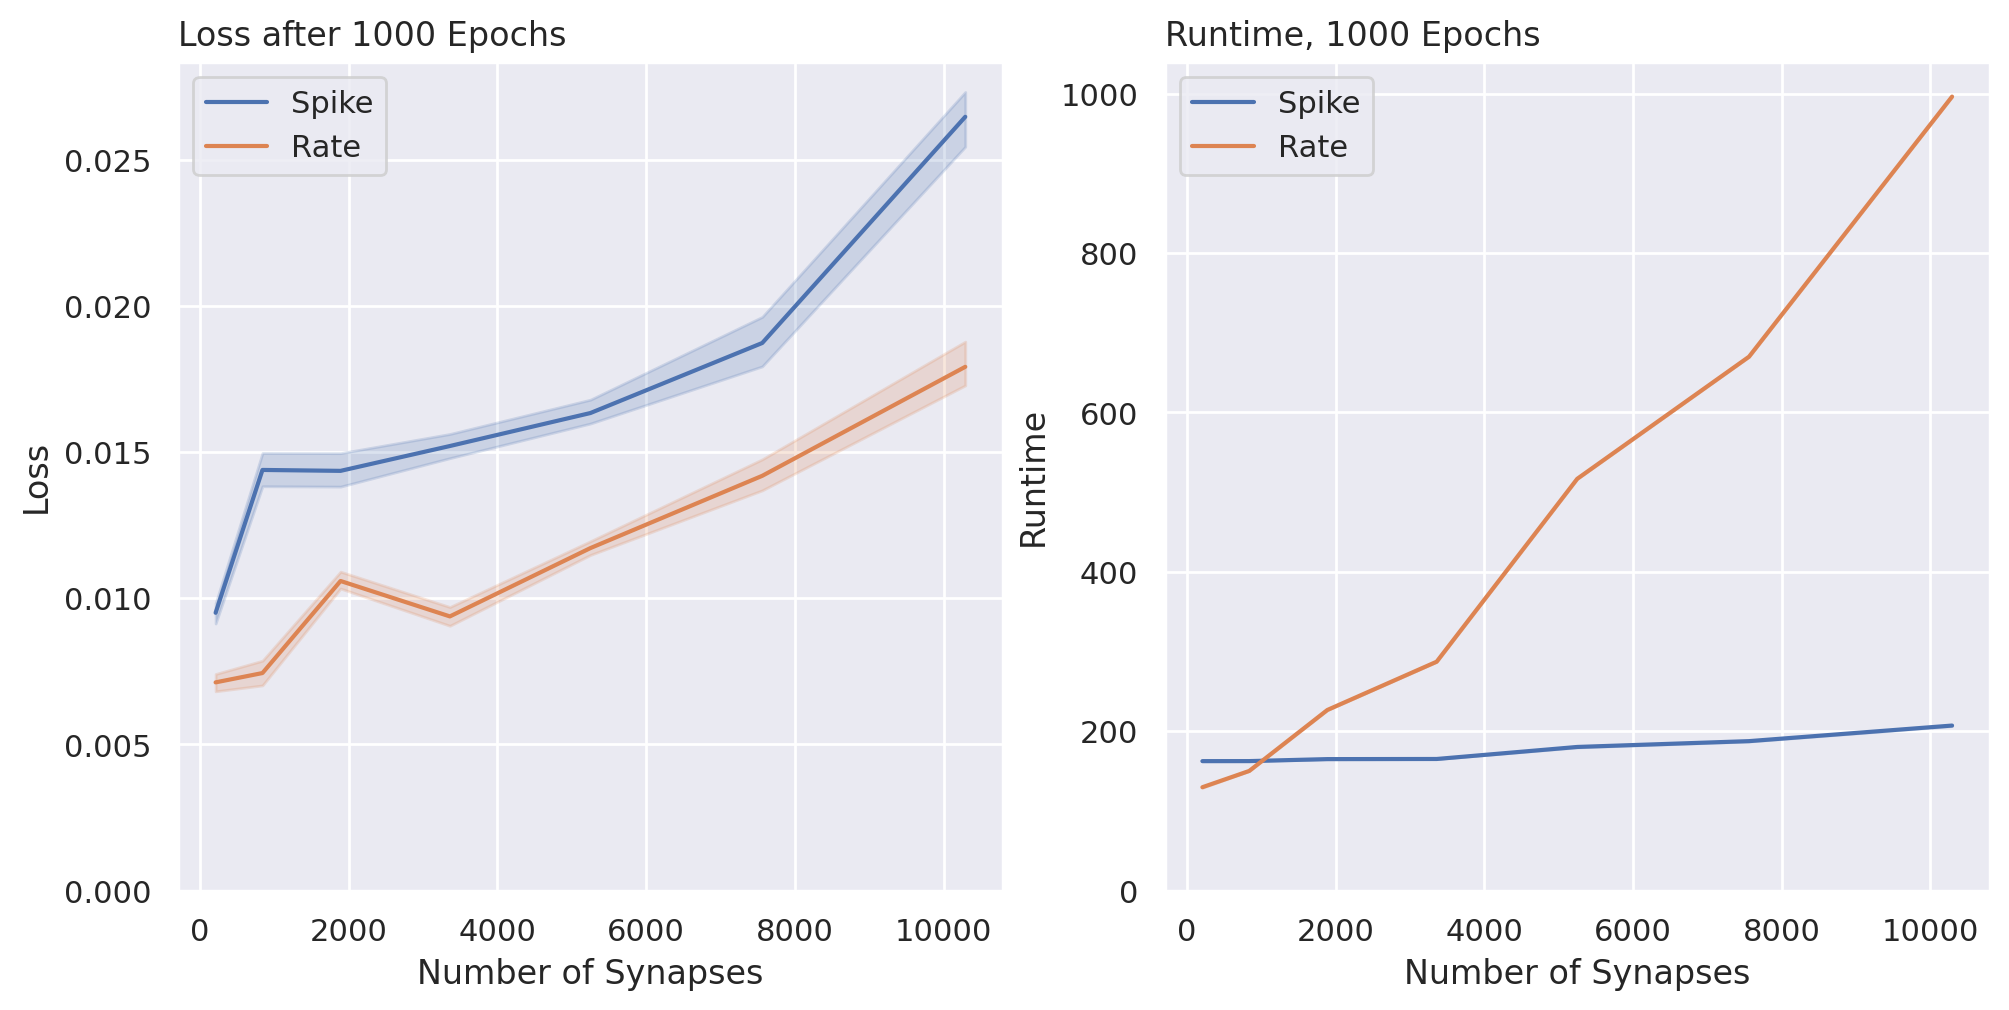

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

#METHOD = "Random Feedback"
METHOD = "Feedback Align"

sns.lineplot(df_learn[(df_learn["Method"] == METHOD) * (df_learn["Epoch"] == 1000)],
             x="Number of Synapses", y="Loss", hue="Model", ax=ax[0])#, units="Sim ID", estimator=None)
ax[0].legend()
ax[0].set_title("Loss after 1000 Epochs", loc="left")
ax[0].set_ylim(bottom=0.)

sns.lineplot(df_runtime[df_runtime["Method"] == METHOD],
             x="Number of Synapses", y="Runtime", hue="Model", ax=ax[1])
ax[1].legend()
ax[1].set_title("Runtime, 1000 Epochs", loc="left")
#ax[1].set_yscale("log")
ax[1].set_ylim(bottom=0.)

#sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
#             x="Epoch", y="Accuracy", hue="Model", ax=ax[1])# units="Sim ID", estimator=None)

#ax[1].legend()
#ax[1].set_title("Feedback Align", loc="left")
#ax[1].set_ylim(bottom=0.6, top=1.025)

#sns.barplot(data=df_runtime, x="Method",
#            hue="Model", y="Runtime", ax=ax[2])

fig.tight_layout(pad=0.5)

plt.show()

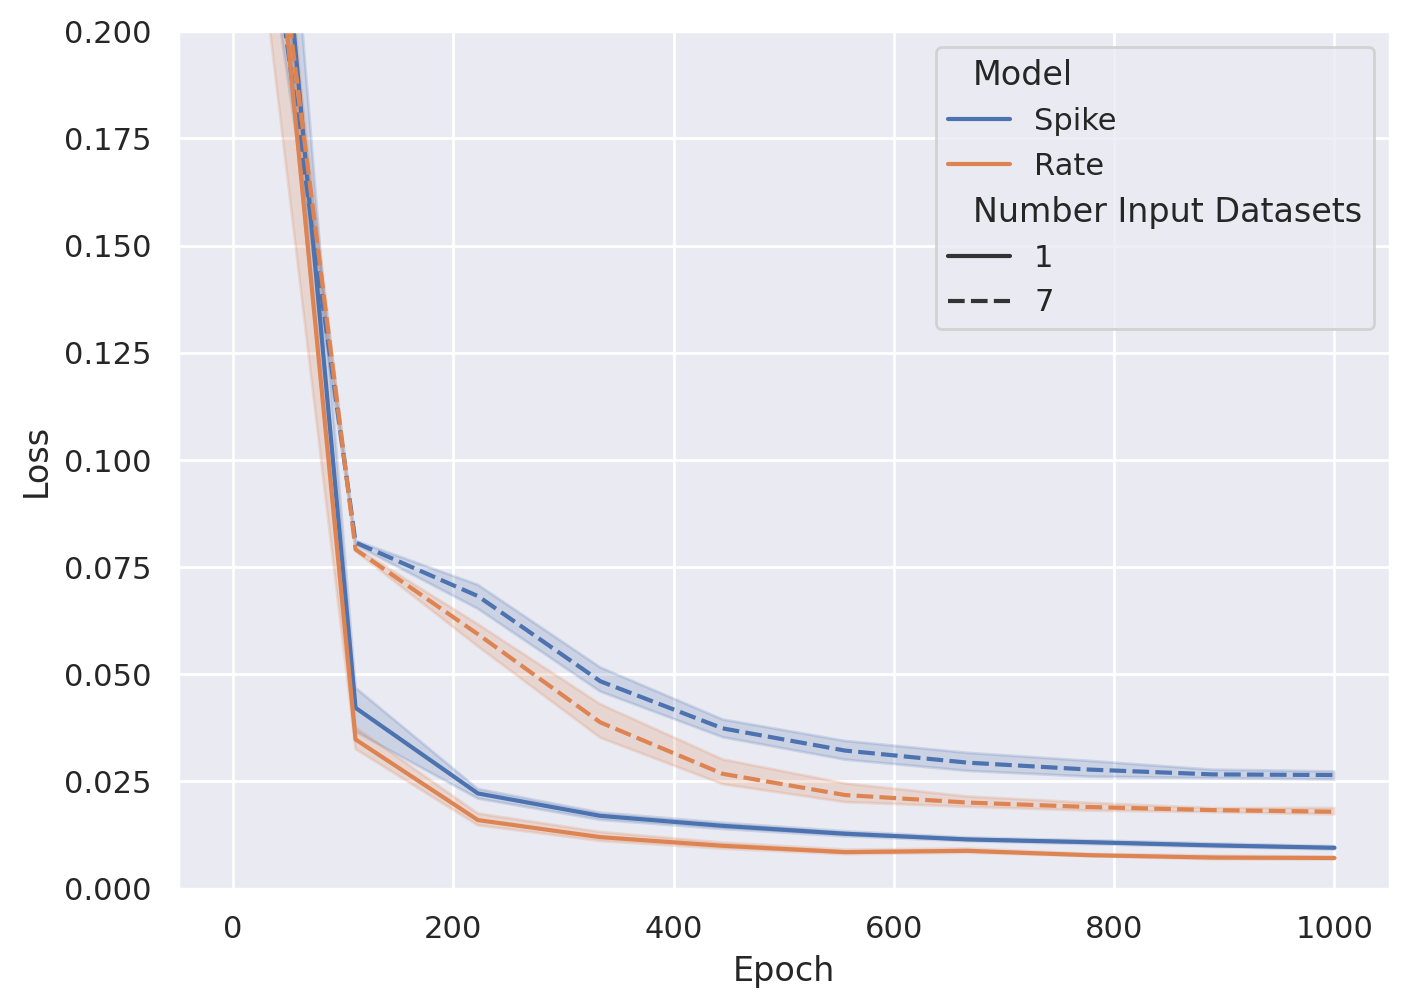

In [34]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

#METHOD = "Random Feedback"
METHOD = "Feedback Align"

sns.lineplot(df_learn[(df_learn["Method"] == "Feedback Align")
                      & ((df_learn["Number Input Datasets"] == 1) | (df_learn["Number Input Datasets"] == 7))],
             x="Epoch", y="Loss", hue="Model", style="Number Input Datasets", ax=ax)
ax.set_ylim(bottom=0., top=0.2)

fig.tight_layout(pad=0.5)

plt.show()